In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# Importing the data

df = pd.read_csv('coaster_db.csv')
df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN


In [3]:
df.shape

(1087, 56)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

## Data Preparation

In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

#### Using only the necessary columns

In [6]:
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer','year_introduced','latitude', 'longitude','Type_Main',
       'opening_date_clean','speed_mph','height_ft','Inversions_clean', 'Gforce_clean']].copy()
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [7]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   Type_Main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  Inversions_clean    1087 non-null   int64         
 12  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [9]:
# Rename our columns

df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [10]:
# Check for duplicate coaster name

df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [11]:
# Checking an example duplicate

df.query('Coaster_Name == "Blue Streak (Conneaut Lake)"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
59,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1937,41.6349,-80.318,Wood,1938-05-23,50.0,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.318,Wood,1938-05-23,50.0,NaN,0,NaN


In [12]:
# Checking all the duplicate with respect to 'Coaster_Name', 'Location', 'Opening_Date'

df.loc[df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [13]:
# Removing all duplicate rows wrt 'Coaster_Name', 'Location', 'Opening_Date'

df = df.loc[ ~ df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop=True).copy()


In [14]:
df.groupby('Manufacturer')['Coaster_Name'].count().sort_values(ascending=False)

Manufacturer
Vekoma                          122
Bolliger & Mabillard            104
Intamin                          84
Arrow Dynamics                   53
Mack Rides                       53
                               ... 
Mack Rides GmbH & Co KG           1
Michael Black and Associates      1
Blackpool Pleasure Beach          1
Bailey Rides, Inc.                1
L&T Systems                       1
Name: Coaster_Name, Length: 102, dtype: int64

## Feature Understanding

### --- Finding year in which most RollerCoasters were introduced

In [15]:
df['Year_Introduced'].value_counts().head(10)

1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
Name: Year_Introduced, dtype: int64

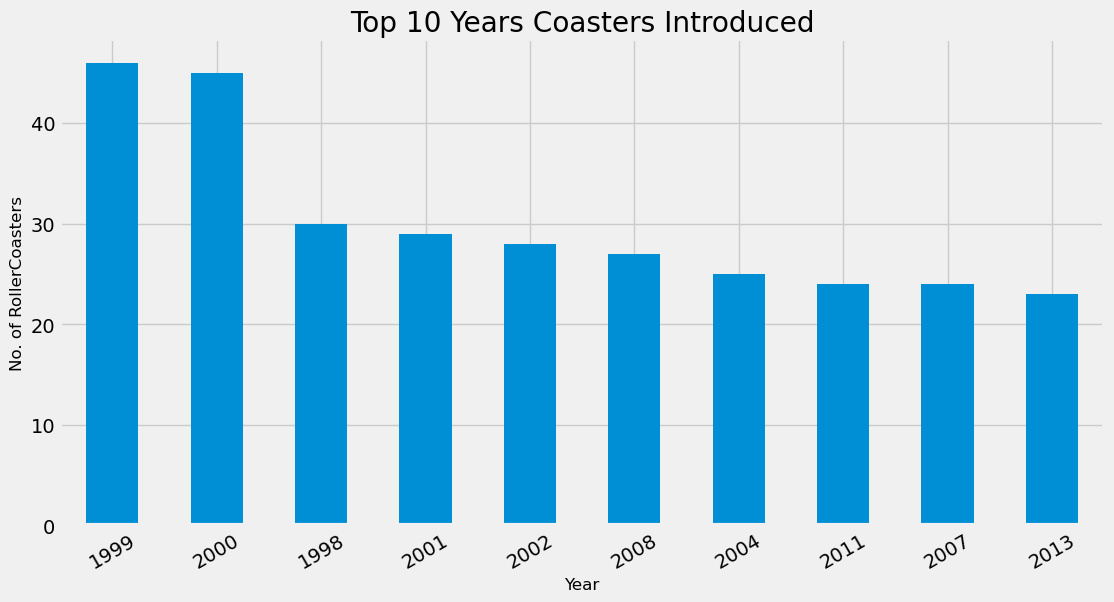

In [16]:
plt.figure(figsize=(12,6))
df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters Introduced')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of RollerCoasters', fontsize=12)
plt.xticks(rotation=30)
plt.show()

### --- Finding the frequency of RollerCoaster Speeds

In [17]:
df['Speed_mph'].value_counts().head(10)

50.0    54
55.0    38
40.0    36
45.0    31
49.7    28
35.0    28
60.0    21
55.9    20
47.0    19
65.0    16
Name: Speed_mph, dtype: int64

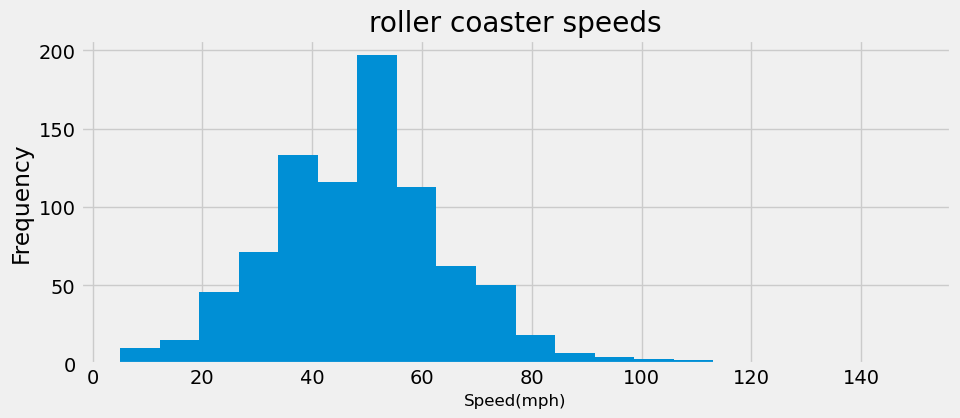

In [18]:

plt.figure(figsize=(10,4))
df['Speed_mph'].plot(kind='hist', bins=20, title='roller coaster speeds')
plt.xlabel('Speed(mph)', fontsize=12)
plt.show()

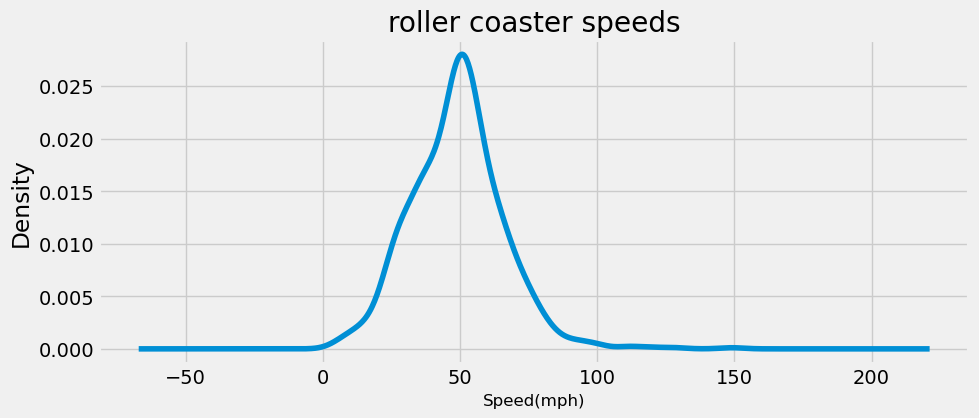

In [19]:
# Using kernel density estimation (KDE)

plt.figure(figsize=(10,4))
df['Speed_mph'].plot(kind='kde', title='roller coaster speeds')
plt.xlabel('Speed(mph)', fontsize=12)
plt.show()

### --- Which material has been used the most?

In [20]:
df['Type_Main'].value_counts()

Steel    728
Wood     191
Other     71
Name: Type_Main, dtype: int64

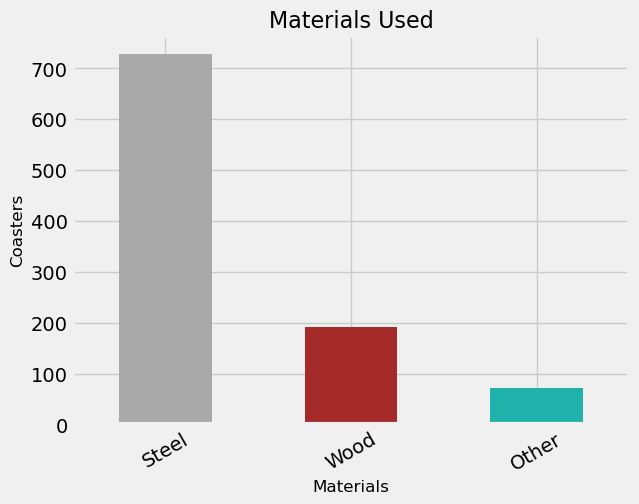

In [21]:
df['Type_Main'].value_counts().plot(kind='bar', color=['darkgrey', 'brown', 'lightseagreen'])
plt.title('Materials Used', fontsize=16)
plt.xlabel('Materials', fontsize=12)
plt.ylabel('Coasters', fontsize=12)
plt.xticks(rotation=30)
plt.show()

### --- Which coaster has faced heighest Gforce?


In [22]:

heighest_Gforce = df.groupby('Coaster_Name')['Gforce'].max().sort_values(ascending=False).head(5)

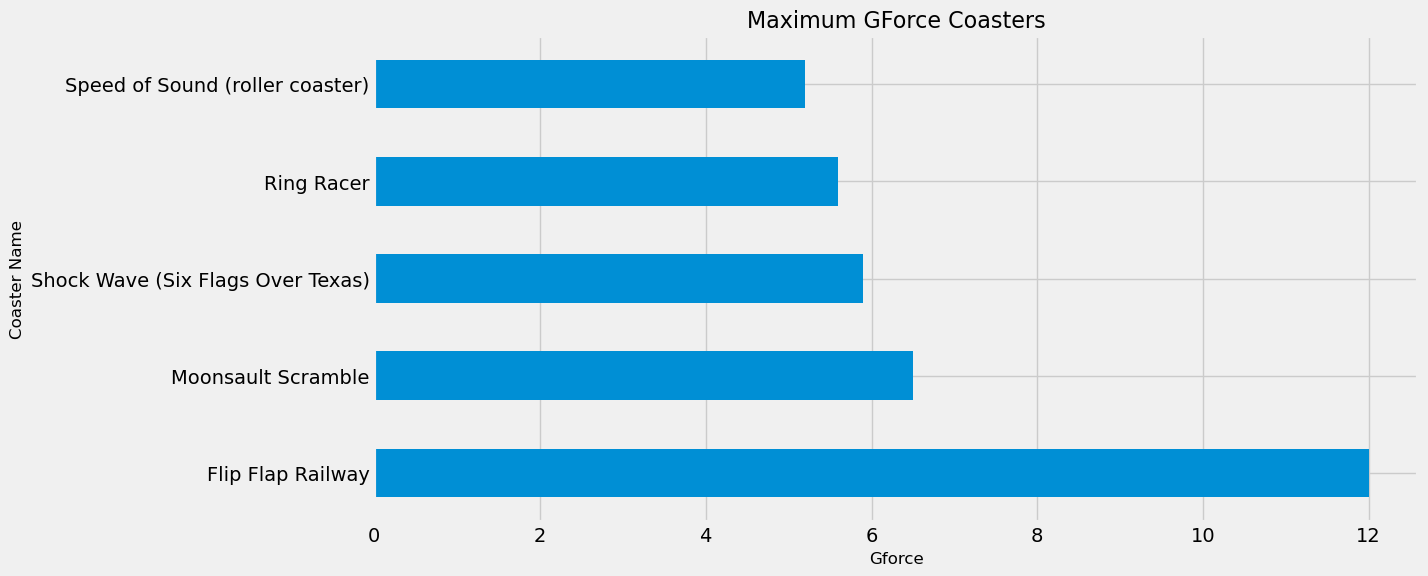

In [23]:
plt.figure(figsize=(12,6))
heighest_Gforce.plot(kind='barh')
plt.title('Maximum GForce Coasters', fontsize=16)
plt.xlabel('Gforce',fontsize=12)
plt.ylabel('Coaster Name',fontsize=12)
plt.show()

### --- Which is the heighest coaster?

In [24]:
heighest_Coaster = df.groupby('Coaster_Name')['Height_ft'].max().sort_values(ascending=False).head(5)
# heighest_Coaster = df.groupby(['Coaster_Name','Height_ft']).max().sort_values(by='Coaster_Name', ascending=False)


In [25]:
df.loc[df['Coaster_Name'] == 'Tower of Terror II']

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
409,Tower of Terror II,Dreamworld,Removed,Intamin,1997,-27.8641,153.3174,Steel,1997-01-23,100.0,377.3,0,4.5


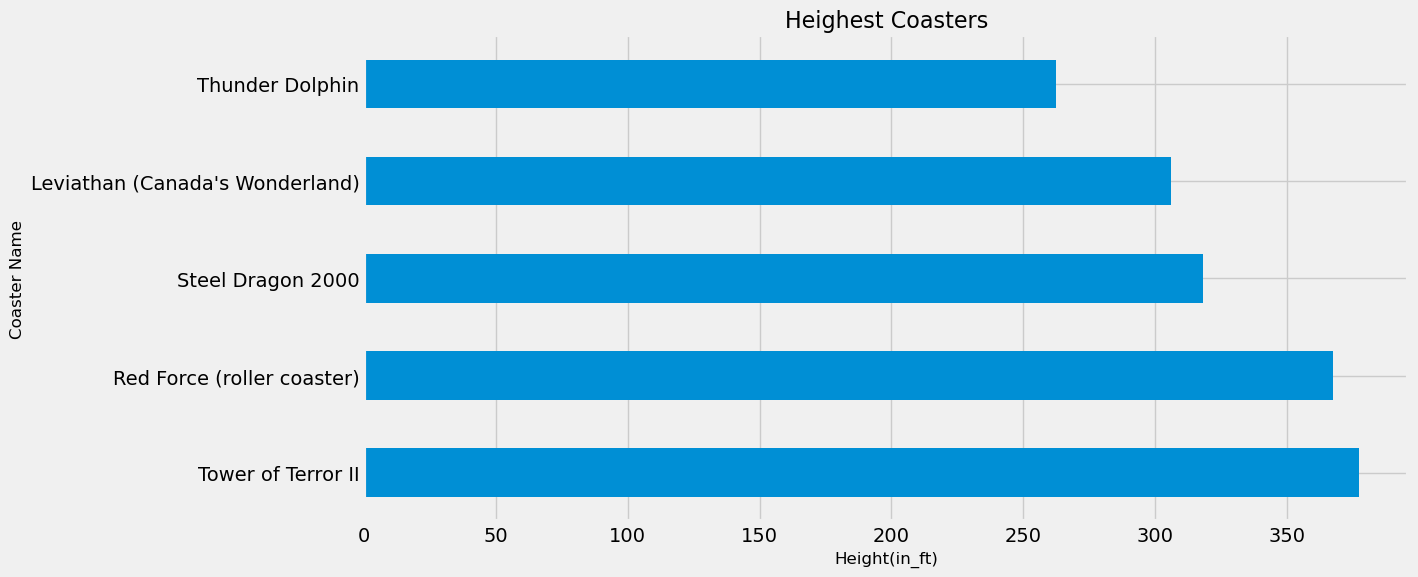

In [26]:
plt.figure(figsize=(12,6))
heighest_Coaster.plot(kind='barh')
plt.title('Heighest Coasters', fontsize=16)
plt.xlabel('Height(in_ft)',fontsize=12)
plt.ylabel('Coaster Name',fontsize=12)
plt.show()

### --- Which location has the most RollerCoasters?

In [27]:

Loc_Max_Coaster = df.query('Location != "Other"').groupby('Location')['Coaster_Name'].count().sort_values(ascending=False).head(5)


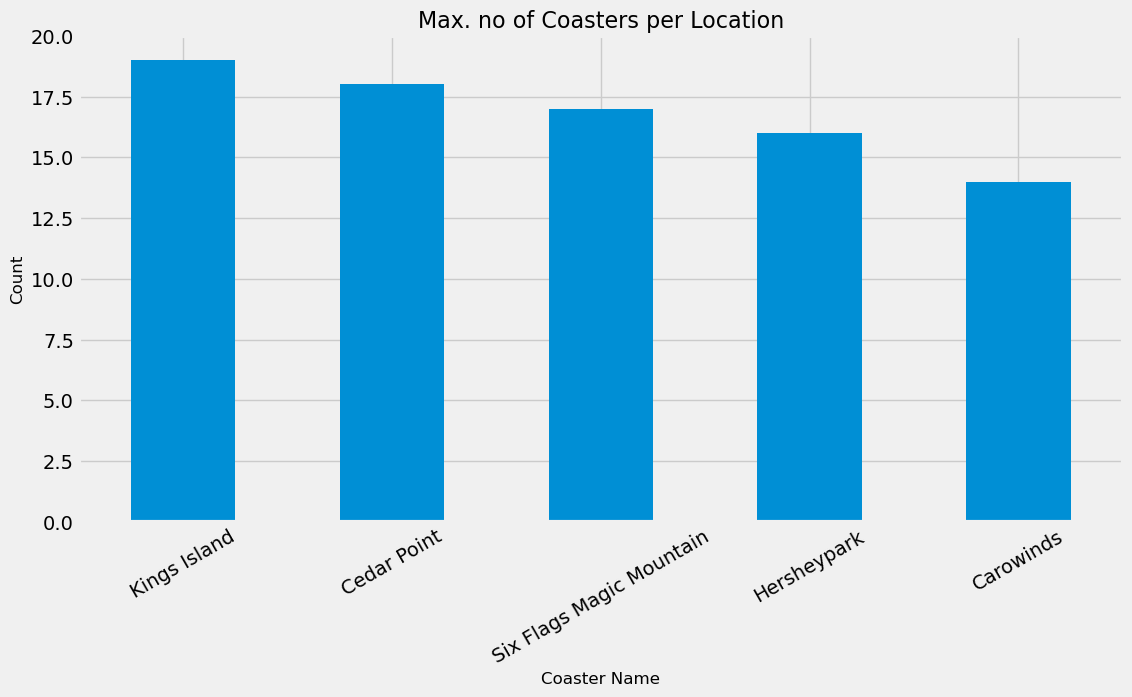

In [28]:
plt.figure(figsize=(12,6))
Loc_Max_Coaster.plot(kind='bar')
plt.title('Max. no of Coasters per Location', fontsize=16)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Coaster Name',fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0,20)
plt.show()

### --- Which manufacturer has the most coasters?

In [29]:
Manufac_Most_Coasters = df['Manufacturer'].value_counts().head(5)

# Creating a dataframe
df_Manufac_Most_Coasters = pd.DataFrame(Manufac_Most_Coasters).reset_index()
df_Manufac_Most_Coasters.columns = ['Manufacturer', 'Counts'] 

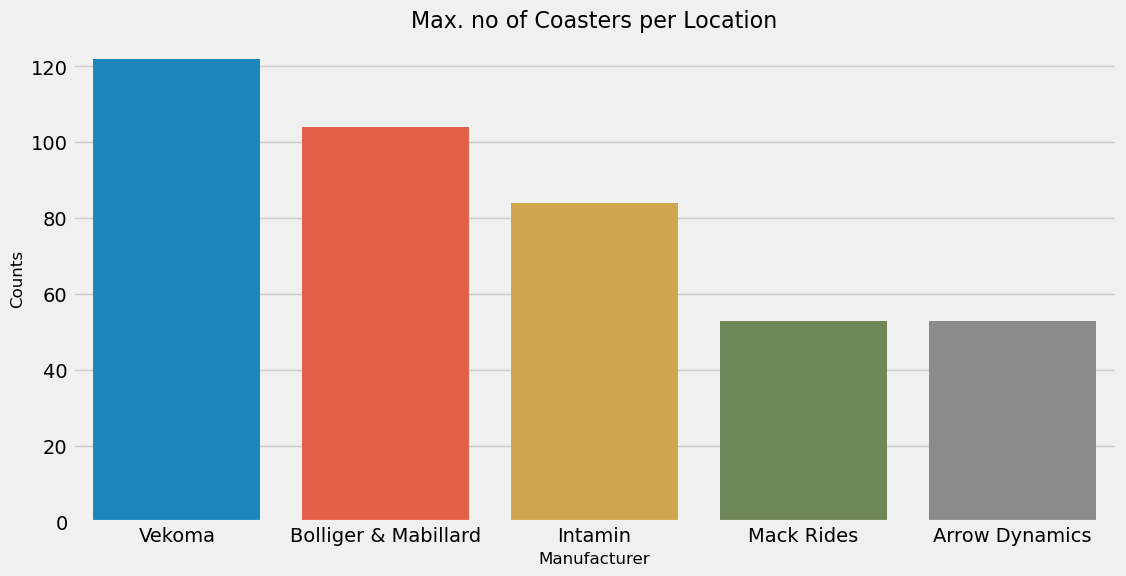

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x ='Manufacturer', y='Counts', data = df_Manufac_Most_Coasters)
plt.title('Max. no of Coasters per Location', fontsize=16)
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Manufacturer',fontsize=12)
plt.show()

## Feature Relationships

### --- Relation between Coaster speed and Height with Material

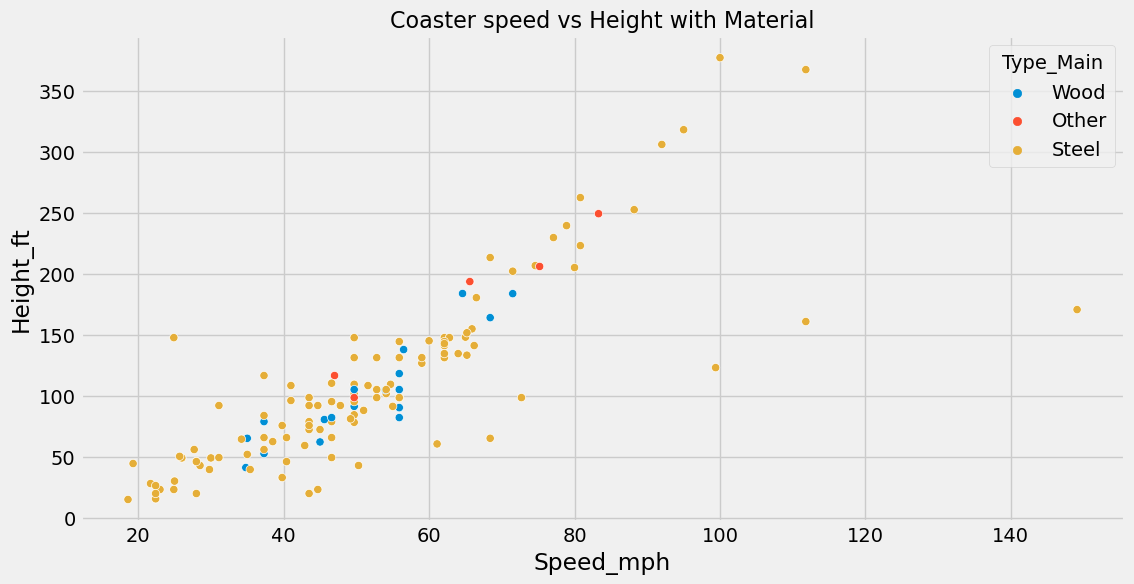

In [31]:

plt.figure(figsize=(12,6))
# df.plot(kind='scatter', x='Height_ft', y='Speed_mph',figsize=(12,8))
sns.scatterplot(data=df, x='Speed_mph', y='Height_ft' ,hue='Type_Main')
plt.title('Coaster speed vs Height with Material', fontsize=16)
plt.show()

### --- Relation between Coaster speed and Height with Year Introduced

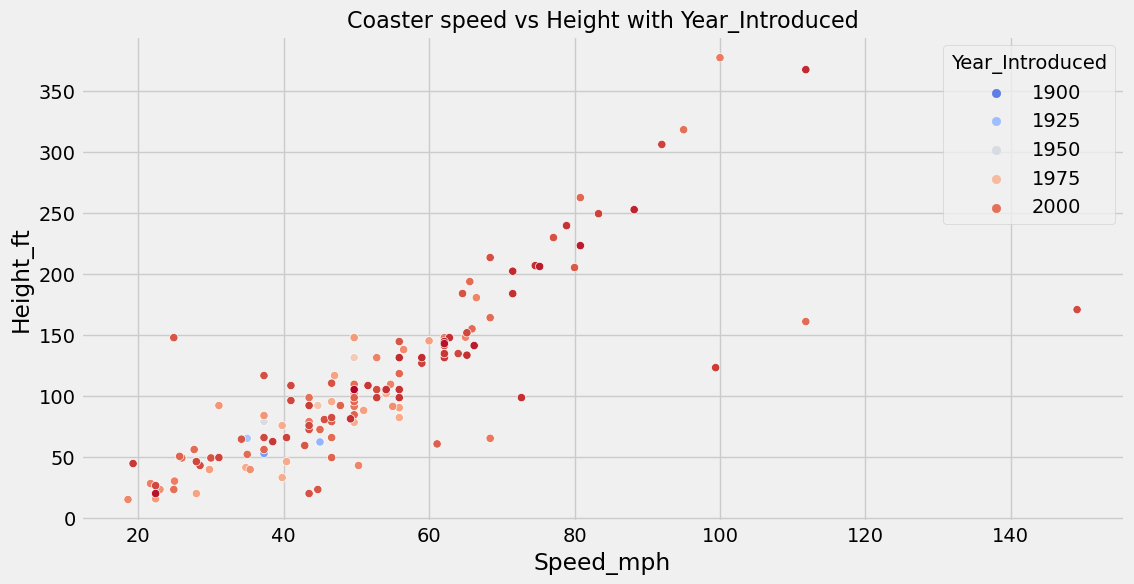

In [32]:
plt.figure(figsize=(12,6))
# df.plot(kind='scatter', x='Height_ft', y='Speed_mph',figsize=(12,8))
sns.scatterplot(data=df, x='Speed_mph', y='Height_ft' ,hue='Year_Introduced', palette='coolwarm')
plt.title('Coaster speed vs Height with Year_Introduced', fontsize=16)
plt.show()

### --- Relation between few Features

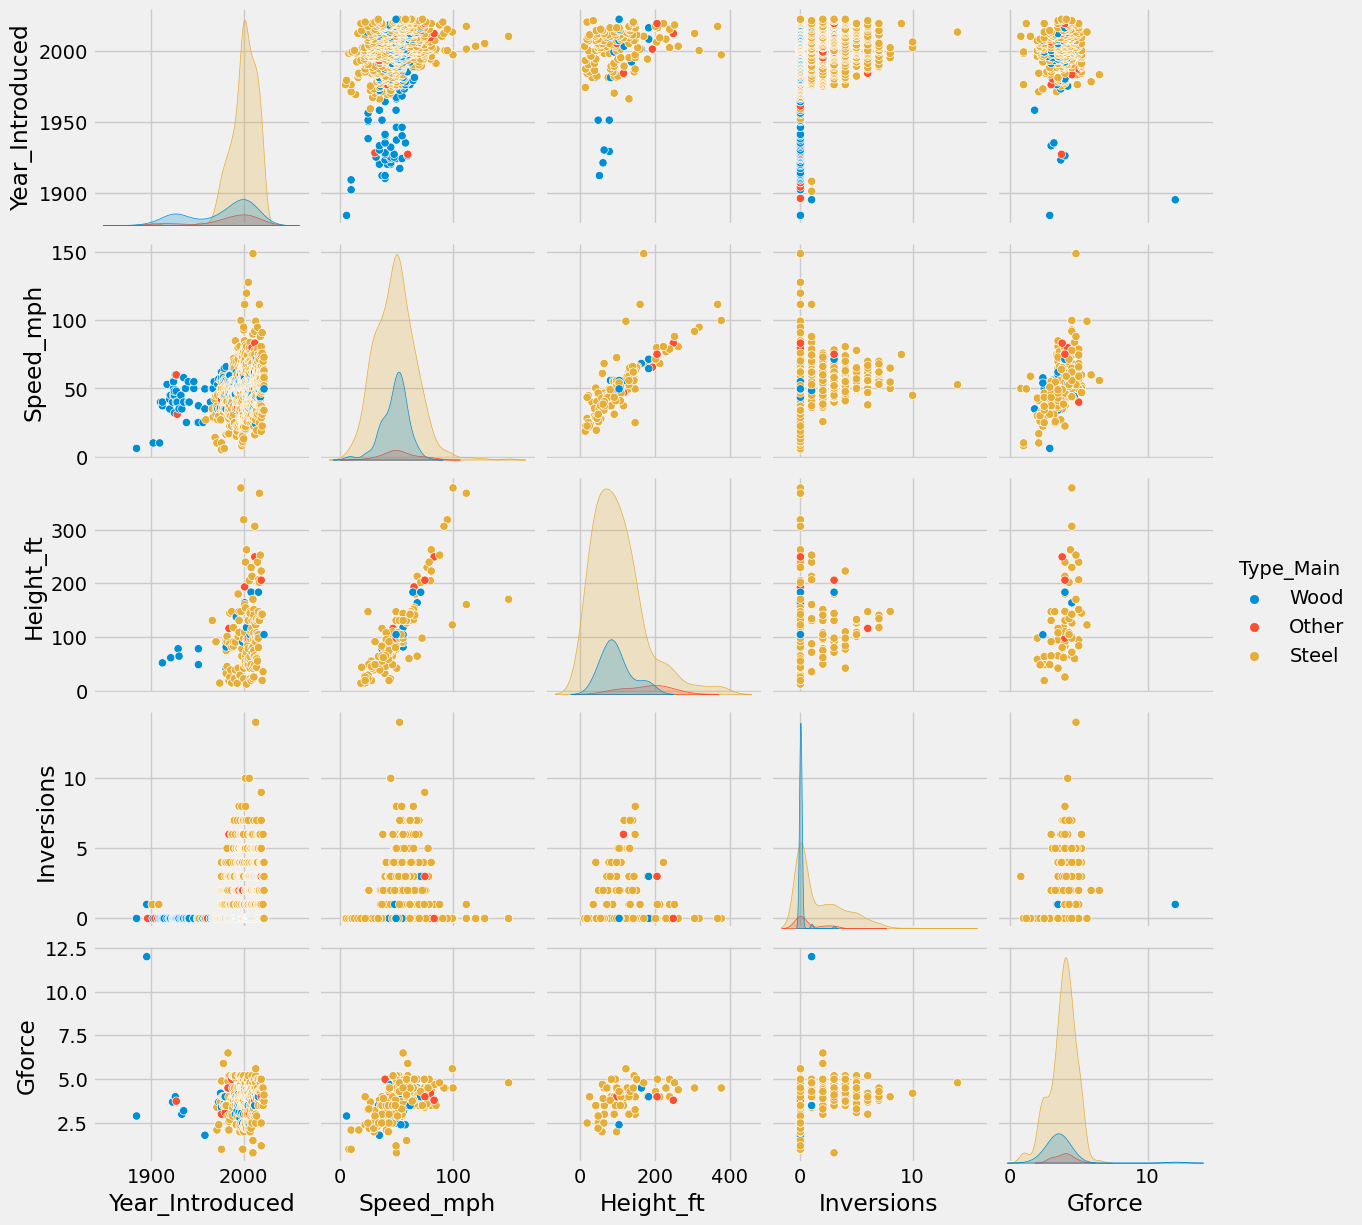

In [33]:
sns.pairplot(data = df, vars=['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce'], hue='Type_Main')
plt.show()

### --- Determining the Correlation

In [34]:
df_corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


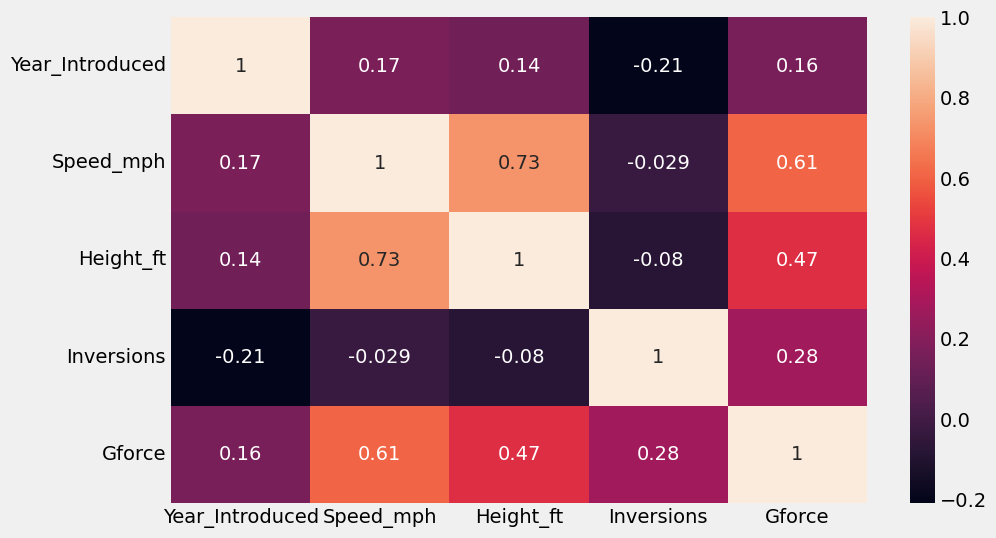

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_corr, annot=True)
plt.show()

### --- What are the locations with the fastest roller coasters (minimum of 10)?

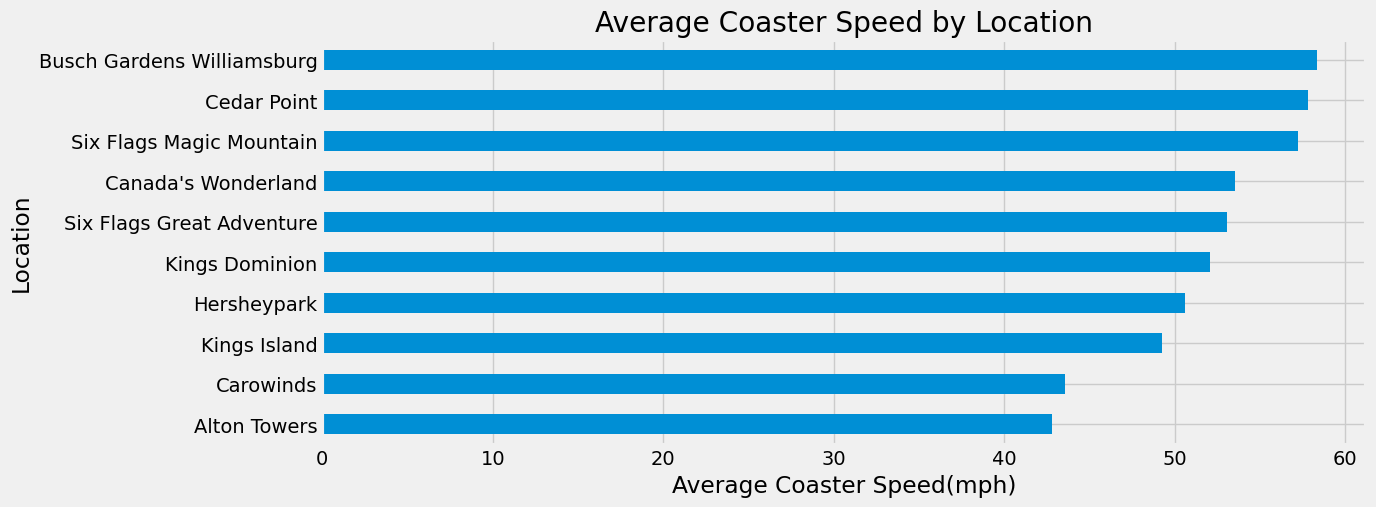

In [36]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed(mph)')
plt.show()